TASK-06 Prediction Using Decision Tree Algorithm

Level:-Intermediate

PUSHKARAJ SANJAY NAIK

In [1]:
#importing all libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read the data

df=pd.read_csv('D:\Pandas\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#checking for null values

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [8]:
#Convert Categorical value into Numeric value using LabelEncoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [10]:
#split up data into Training & Test set

X=df.drop(["Id","Species"],axis=1)
y=df["Species"]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Decission Tree

In [12]:
#Training a Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [13]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Prediction and Evaluation

In [14]:
prediction=dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [16]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [17]:
print(confusion_matrix(y_test,prediction))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [18]:
print(accuracy_score(y_test,prediction)*100,"%")

100.0 %


Tree Visualisation

[Text(446.4, 498.3, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(377.7230769230769, 407.70000000000005, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(515.0769230769231, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(274.7076923076923, 317.1, 'X[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(137.35384615384615, 226.5, 'X[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(68.67692307692307, 135.89999999999998, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(206.03076923076924, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(412.0615384615385, 226.5, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(343.38461538461536, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(480.73846153846154, 135.89999999999998, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(412.0615384615385, 45.2999

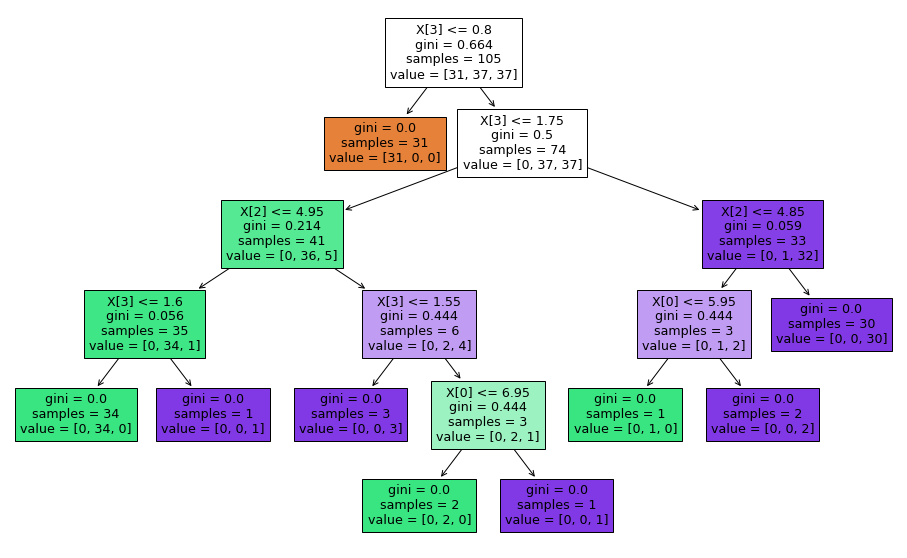

In [19]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dtree,filled=True)

                                                              THANK YOU................